In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt, ceil, log2
from collections import Counter

In [323]:
df = pd.read_csv('./students-performance-evaluation.csv')
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


### Предобработка данных

#### Общие проверки

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [325]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


Видим, что пустых значений нету.

In [326]:
null_counts = pd.DataFrame([df.isnull().sum(), df.isna().sum()], index=['isnull', 'isna'])
null_counts = null_counts.loc[:, (null_counts != 0).any(axis=0)]
display(null_counts)


""
isnull
isna


#### Визуализация 

In [327]:
X = df.drop(['GRADE', 'STUDENT ID'], axis=1)
y = df['GRADE']

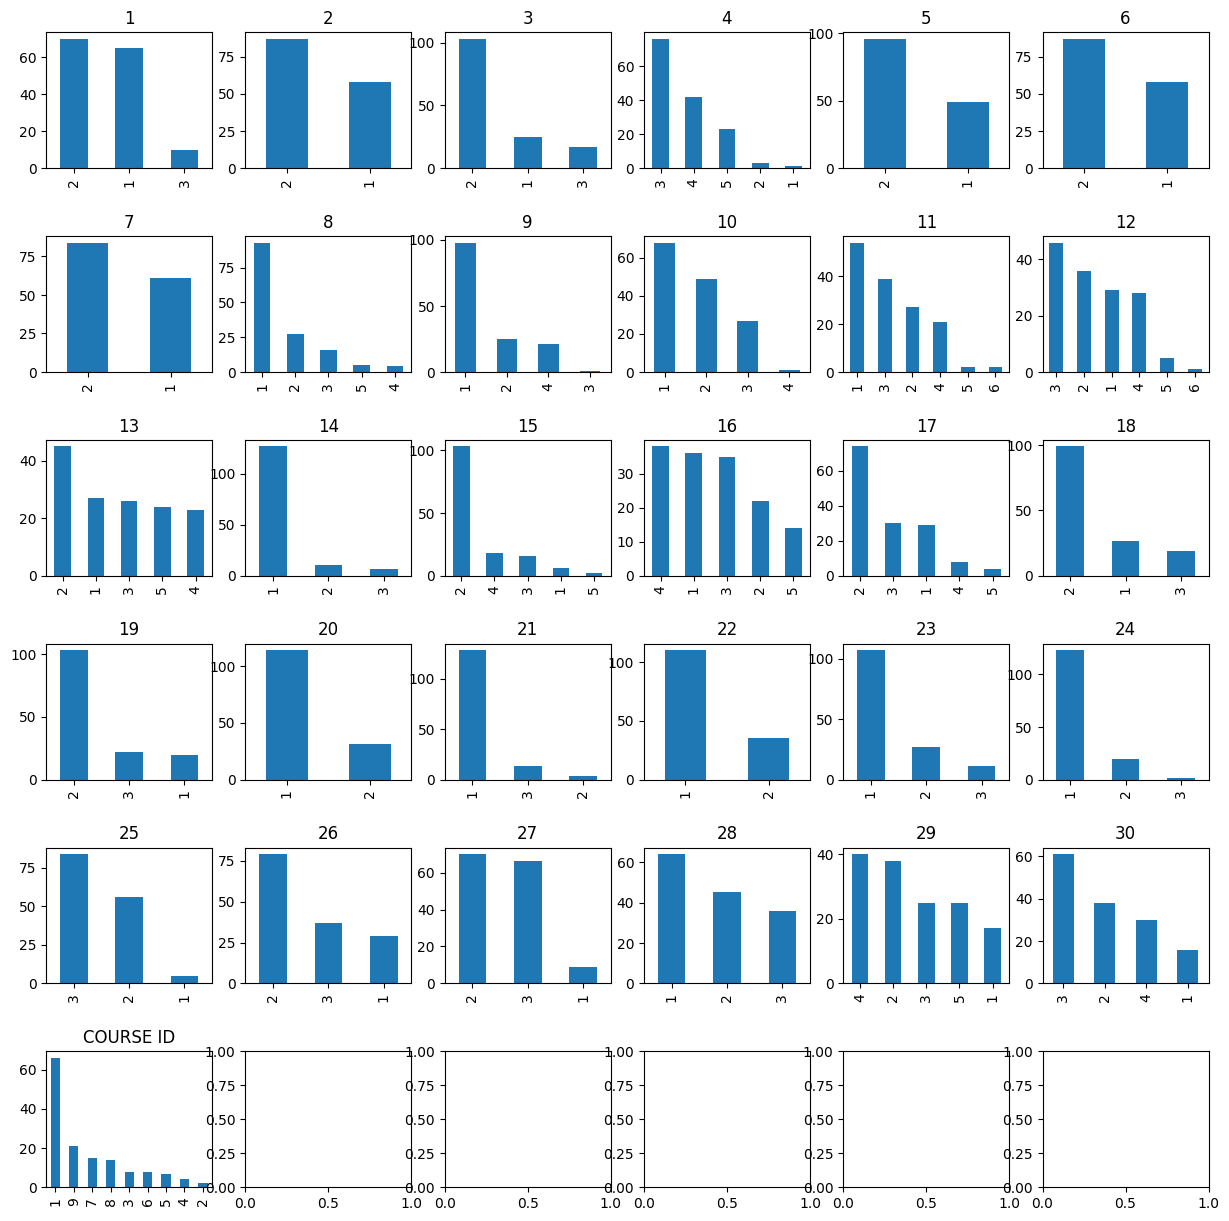

In [328]:
fig, axs = plt.subplots(ceil(sqrt(len(X.columns))), ceil(sqrt(len(X.columns))), figsize=(15, 15), sharex=False, sharey=False, gridspec_kw={'hspace': 0.5})
for ax, col in zip(axs.flatten(), X.columns):
    X[col].value_counts().plot(kind="bar", ax=ax).set_title(col)
plt.show()

<Axes: >

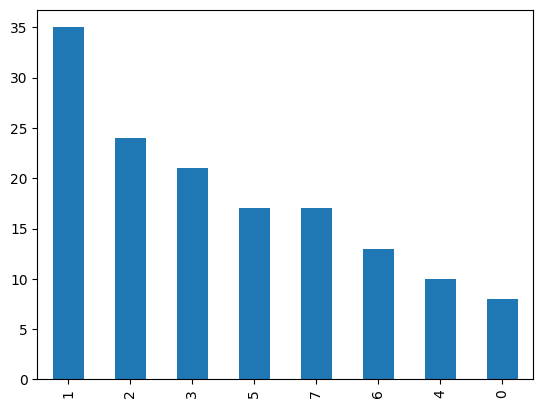

In [329]:
y.value_counts().plot(kind="bar")

<Axes: >

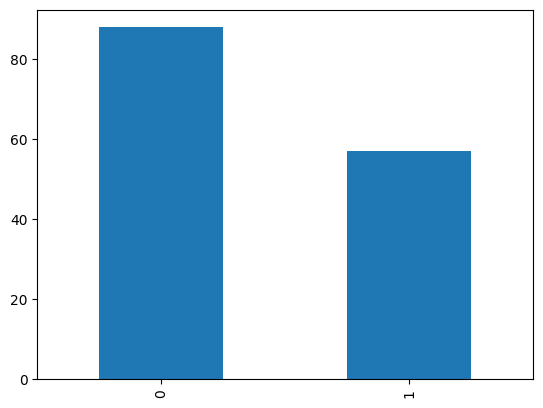

In [330]:
y = pd.Series([1 if i >=4 else 0 for i in y])
y.value_counts().plot(kind="bar")

### Decision Tree

In [331]:
cols = X.columns
cols = np.random.choice(cols, ceil(sqrt(len(cols))), replace=False)
X = X[cols]
X.head()


,17,11,26,23,COURSE ID,13
0,3,1,2,1,1,3
1,2,2,2,1,1,2
2,2,2,2,1,1,2
3,3,1,2,1,1,5
4,2,3,2,2,1,2


In [332]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [333]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

In [334]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split = 2, max_depth = 100, n_features = None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])
        self.root = self._grow_tree(X, y)
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if(depth >= self.max_depth or n_labels == 1 or n_samples <= self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # find the best split
        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        best_feat, best_thresh, best_gain = self._best_split(X, y, feat_idxs)
        if round(best_gain, 5) == 0:
            return Node(value=self._most_common_label(y))

        # create child notes and call _grow_tree() recursively
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:

                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh, best_gain

    def _information_gain(self, y, X_column, split_thresh):
        # parent node entropy
        parent_entropy = self._entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # weighted average child entropy
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # return information gain
        ig = parent_entropy - child_entropy
        return ig
    
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])
    
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [340]:
dt = DecisionTree()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy(y_test, y_pred)

0.7931034482758621

##### Проверка 

In [336]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_features=ceil(sqrt(X_train.shape[1])))
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=0)
clf.fit(X_train, y_train)
print(accuracy(y_test,clf.predict(X_test)))

0.7931034482758621
0.8620689655172413


### Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall

In [337]:
print(y_pred)
print(y_test)

[1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0]
[1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0]


1 - Positive, 0 - Negative [[TN, FP], [FN, TP]]

In [345]:
def confusion_matrix(pred_y, true_y):
    res = np.zeros((2, 2))
    for pred, true in zip(pred_y, true_y):
        pred = 1 if pred == 1 else 0
        true = 1 if true == 1 else 0
        res[pred][true] += 1
    return res

In [346]:
print(confusion_matrix(y_pred, y_test))

[[14.  3.]
 [ 3.  9.]]


In [348]:
def accuracy(conf):
    return (conf[1][1] + conf[0][0]) / sum(conf.flatten())
def precision(conf):
    return conf[1][1] / (conf[1][1] + conf[0][1])
def recall(conf):
    return conf[1][1] / (conf[1][1] + conf[1][0])
print("Accuracy: ", accuracy(confusion_matrix(y_pred, y_test)))
print("Precision: ", precision(confusion_matrix(y_pred, y_test)))
print("Recall: ", recall(confusion_matrix(y_pred, y_test)))
    

Accuracy:  0.7931034482758621
Precision:  0.75
Recall:  0.75
